In [1]:
import sys
print(sys.executable)


C:\Users\user\Documents\Automatic_Question_Extractor\venv\Scripts\python.exe


In [2]:
!{sys.executable} -m pip install pydantic python-dotenv rich


# RD Sharma Question Extractor - Performance Analysis

**WORKABLE AI ASSIGNMENT FOR HIRING**

This notebook provides comprehensive performance analysis and results visualization for the RD Sharma Question Extractor pipeline.

## 📊 Analysis Focus Areas

- **Performance Metrics**: Speed, accuracy, and efficiency analysis
- **Quality Assessment**: LaTeX formatting and question extraction quality
- **Resource Usage**: Memory and computational requirements
- **Scalability Analysis**: Performance across different chapters
- **Error Analysis**: Common issues and their impact

In [5]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd()))  # Adds C:\Users\user\Documents\Automatic_Question_Extractor


In [7]:
from pathlib import Path
import sys

print("Current working directory:", Path.cwd())
print("sys.path:")
for p in sys.path:
    print("  ", p)


Current working directory: C:\Users\user\Documents\Automatic_Question_Extractor\notebooks
sys.path:
   C:\Users\user\AppData\Local\Programs\Python\Python313\python313.zip
   C:\Users\user\AppData\Local\Programs\Python\Python313\DLLs
   C:\Users\user\AppData\Local\Programs\Python\Python313\Lib
   C:\Users\user\AppData\Local\Programs\Python\Python313
   C:\Users\user\Documents\Automatic_Question_Extractor\venv
   
   C:\Users\user\Documents\Automatic_Question_Extractor\venv\Lib\site-packages
   C:\Users\user\Documents\Automatic_Question_Extractor\venv\Lib\site-packages\win32
   C:\Users\user\Documents\Automatic_Question_Extractor\venv\Lib\site-packages\win32\lib
   C:\Users\user\Documents\Automatic_Question_Extractor\venv\Lib\site-packages\Pythonwin
   C:\Users\user\Documents\Automatic_Question_Extractor\notebooks\src
   C:\Users\user\Documents\Automatic_Question_Extractor\notebooks
   C:\Users\user\Documents\Automatic_Question_Extractor\notebooks


In [8]:
import sys
from pathlib import Path
import os

# Go up one level from current notebooks folder to project root
project_root = Path.cwd().parent  # "Automatic_Question_Extractor"

# Change working directory to project root (optional but recommended)
os.chdir(project_root)

# Add project root to sys.path so 'src' package can be imported
sys.path.append(str(project_root))

print("New working directory:", Path.cwd())
print("sys.path updated with:", project_root)


New working directory: C:\Users\user\Documents\Automatic_Question_Extractor
sys.path updated with: C:\Users\user\Documents\Automatic_Question_Extractor


In [1]:
import pydantic
print(pydantic.__version__)


2.11.7


In [7]:
import sys
from pathlib import Path

# Add the parent directory of 'src' to sys.path
project_root ="C:/Users/user/Documents/Automatic_Question_Extractor"
sys.path.append(str(project_root))

from src.config import config


print("OCR Languages:", config.ocr_languages)


OCR Languages: ['en', 'math']


In [8]:
from src.config import config


print("Groq Model:", config.groq_model)
print("PDF Path:", config.pdf_path)

print("OCR Languages:", config.ocr_languages)
print("OCR GPU Enabled:", config.ocr_gpu)
print("OCR Confidence Threshold:", config.ocr_confidence_threshold)

print("Logging Level:", config.log_level)
print("Batch Size:", config.batch_size)
print("Max Workers:", config.max_workers)


Groq Model: meta-llama/llama-4-maverick-17b-128e-instruct
PDF Path: data/rd_sharma_complete.pdf
OCR Languages: ['en', 'math']
OCR GPU Enabled: False
OCR Confidence Threshold: 0.5
Logging Level: INFO
Batch Size: 10
Max Workers: 4


In [9]:
import sys
from pathlib import Path
import os

# Make sure working directory is project root (adjust if needed)
os.chdir("C:/Users/user/Documents/Automatic_Question_Extractor")

# Add root folder to sys.path
sys.path.append(str(Path.cwd()))

from src.config import config
from src.main import QuestionExtractor
from src.utils.logger import get_logger

print("✅ Imports successful!")


✅ Imports successful!


In [15]:
# Analysis imports
import sys
from pathlib import Path
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Any

# Add project root (parent of src) to path
project_root = Path.cwd().parent  # if notebook is inside 'notebooks' folder next to src
sys.path.append(str(project_root))

# Import project modules with absolute imports
from src.config import config
from src.main import QuestionExtractor
from src.utils.logger import get_logger

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Initialize components
extractor = QuestionExtractor()
logger = get_logger(__name__)

print("📊 Analysis environment ready!")


03:18:31 - src.llm_interface.groq_client - INFO - Initialized Groq client with model: meta-llama/llama-4-maverick-17b-128e-instruct
03:18:31 - src.main - INFO - QuestionExtractor initialized successfully
📊 Analysis environment ready!


## 📈 Performance Analysis

In [16]:
# Generate performance data
def generate_performance_data():
    """Generate comprehensive performance data across multiple chapters."""
    
    # Test chapters
    test_chapters = [
        (21, "21.1"),
        (25, "25.1"),
        (30, "30.3"),
        (15, "15.1"),
        (10, "10.1"),
        (20, "20.1"),
        (35, "35.1")
    ]
    
    performance_data = []
    
    for chapter, topic in test_chapters:
        print(f"🔄 Analyzing Chapter {chapter}, Topic {topic}...")
        
        try:
            # Time the extraction
            start_time = time.time()
            questions = extractor.extract_questions(chapter, topic, "json")
            extraction_time = time.time() - start_time
            
            # Analyze results
            question_count = len(questions) if questions else 0
            
            # Calculate quality metrics
            valid_questions = 0
            latex_errors = 0
            
            if questions:
                for question in questions:
                    question_text = question.get('question_text', '')
                    # Simple validation
                    if '$' in question_text and len(question_text) > 10:
                        valid_questions += 1
                    if '\\text{' in question_text:
                        latex_errors += 1
            
            quality_score = (valid_questions / question_count * 100) if question_count > 0 else 0
            
            performance_data.append({
                'chapter': chapter,
                'topic': topic,
                'extraction_time': extraction_time,
                'question_count': question_count,
                'valid_questions': valid_questions,
                'quality_score': quality_score,
                'latex_errors': latex_errors,
                'questions_per_second': question_count / extraction_time if extraction_time > 0 else 0
            })
            
            print(f"   ✅ Time: {extraction_time:.2f}s, Questions: {question_count}, Quality: {quality_score:.1f}%")
            
        except Exception as e:
            print(f"   ❌ Failed: {str(e)}")
    
    return performance_data

# Generate performance data
performance_data = generate_performance_data()
df = pd.DataFrame(performance_data)

print(f"\n📊 Generated performance data for {len(df)} chapters")

🔄 Analyzing Chapter 21, Topic 21.1...
03:19:02 - src.main - INFO - Starting extraction for Chapter 21, Topic 21.1


Output()

03:19:03 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:03 - src.main - INFO - Extraction completed: 2 questions extracted in 1.71s
   ✅ Time: 1.72s, Questions: 2, Quality: 100.0%
🔄 Analyzing Chapter 25, Topic 25.1...
03:19:03 - src.main - INFO - Starting extraction for Chapter 25, Topic 25.1


Output()

03:19:04 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:04 - src.main - INFO - Extraction completed: 2 questions extracted in 0.71s
   ✅ Time: 0.72s, Questions: 2, Quality: 100.0%
🔄 Analyzing Chapter 30, Topic 30.3...
03:19:04 - src.main - INFO - Starting extraction for Chapter 30, Topic 30.3


Output()

03:19:05 - src.llm_interface.groq_client - INFO - Successfully extracted 6 questions


03:19:05 - src.main - INFO - Extraction completed: 6 questions extracted in 1.20s
   ✅ Time: 1.21s, Questions: 6, Quality: 100.0%
🔄 Analyzing Chapter 15, Topic 15.1...
03:19:05 - src.main - INFO - Starting extraction for Chapter 15, Topic 15.1


Output()

03:19:06 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:06 - src.main - INFO - Extraction completed: 2 questions extracted in 0.69s
   ✅ Time: 0.70s, Questions: 2, Quality: 100.0%
🔄 Analyzing Chapter 10, Topic 10.1...
03:19:06 - src.main - INFO - Starting extraction for Chapter 10, Topic 10.1


Output()

03:19:07 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:07 - src.main - INFO - Extraction completed: 2 questions extracted in 1.20s
   ✅ Time: 1.21s, Questions: 2, Quality: 100.0%
🔄 Analyzing Chapter 20, Topic 20.1...
03:19:07 - src.main - INFO - Starting extraction for Chapter 20, Topic 20.1


Output()

03:19:12 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:12 - src.main - INFO - Extraction completed: 2 questions extracted in 5.02s
   ✅ Time: 5.02s, Questions: 2, Quality: 100.0%
🔄 Analyzing Chapter 35, Topic 35.1...
03:19:12 - src.main - INFO - Starting extraction for Chapter 35, Topic 35.1


Output()

03:19:25 - src.llm_interface.groq_client - INFO - Successfully extracted 2 questions


03:19:25 - src.main - INFO - Extraction completed: 2 questions extracted in 12.75s
   ✅ Time: 12.75s, Questions: 2, Quality: 100.0%

📊 Generated performance data for 7 chapters


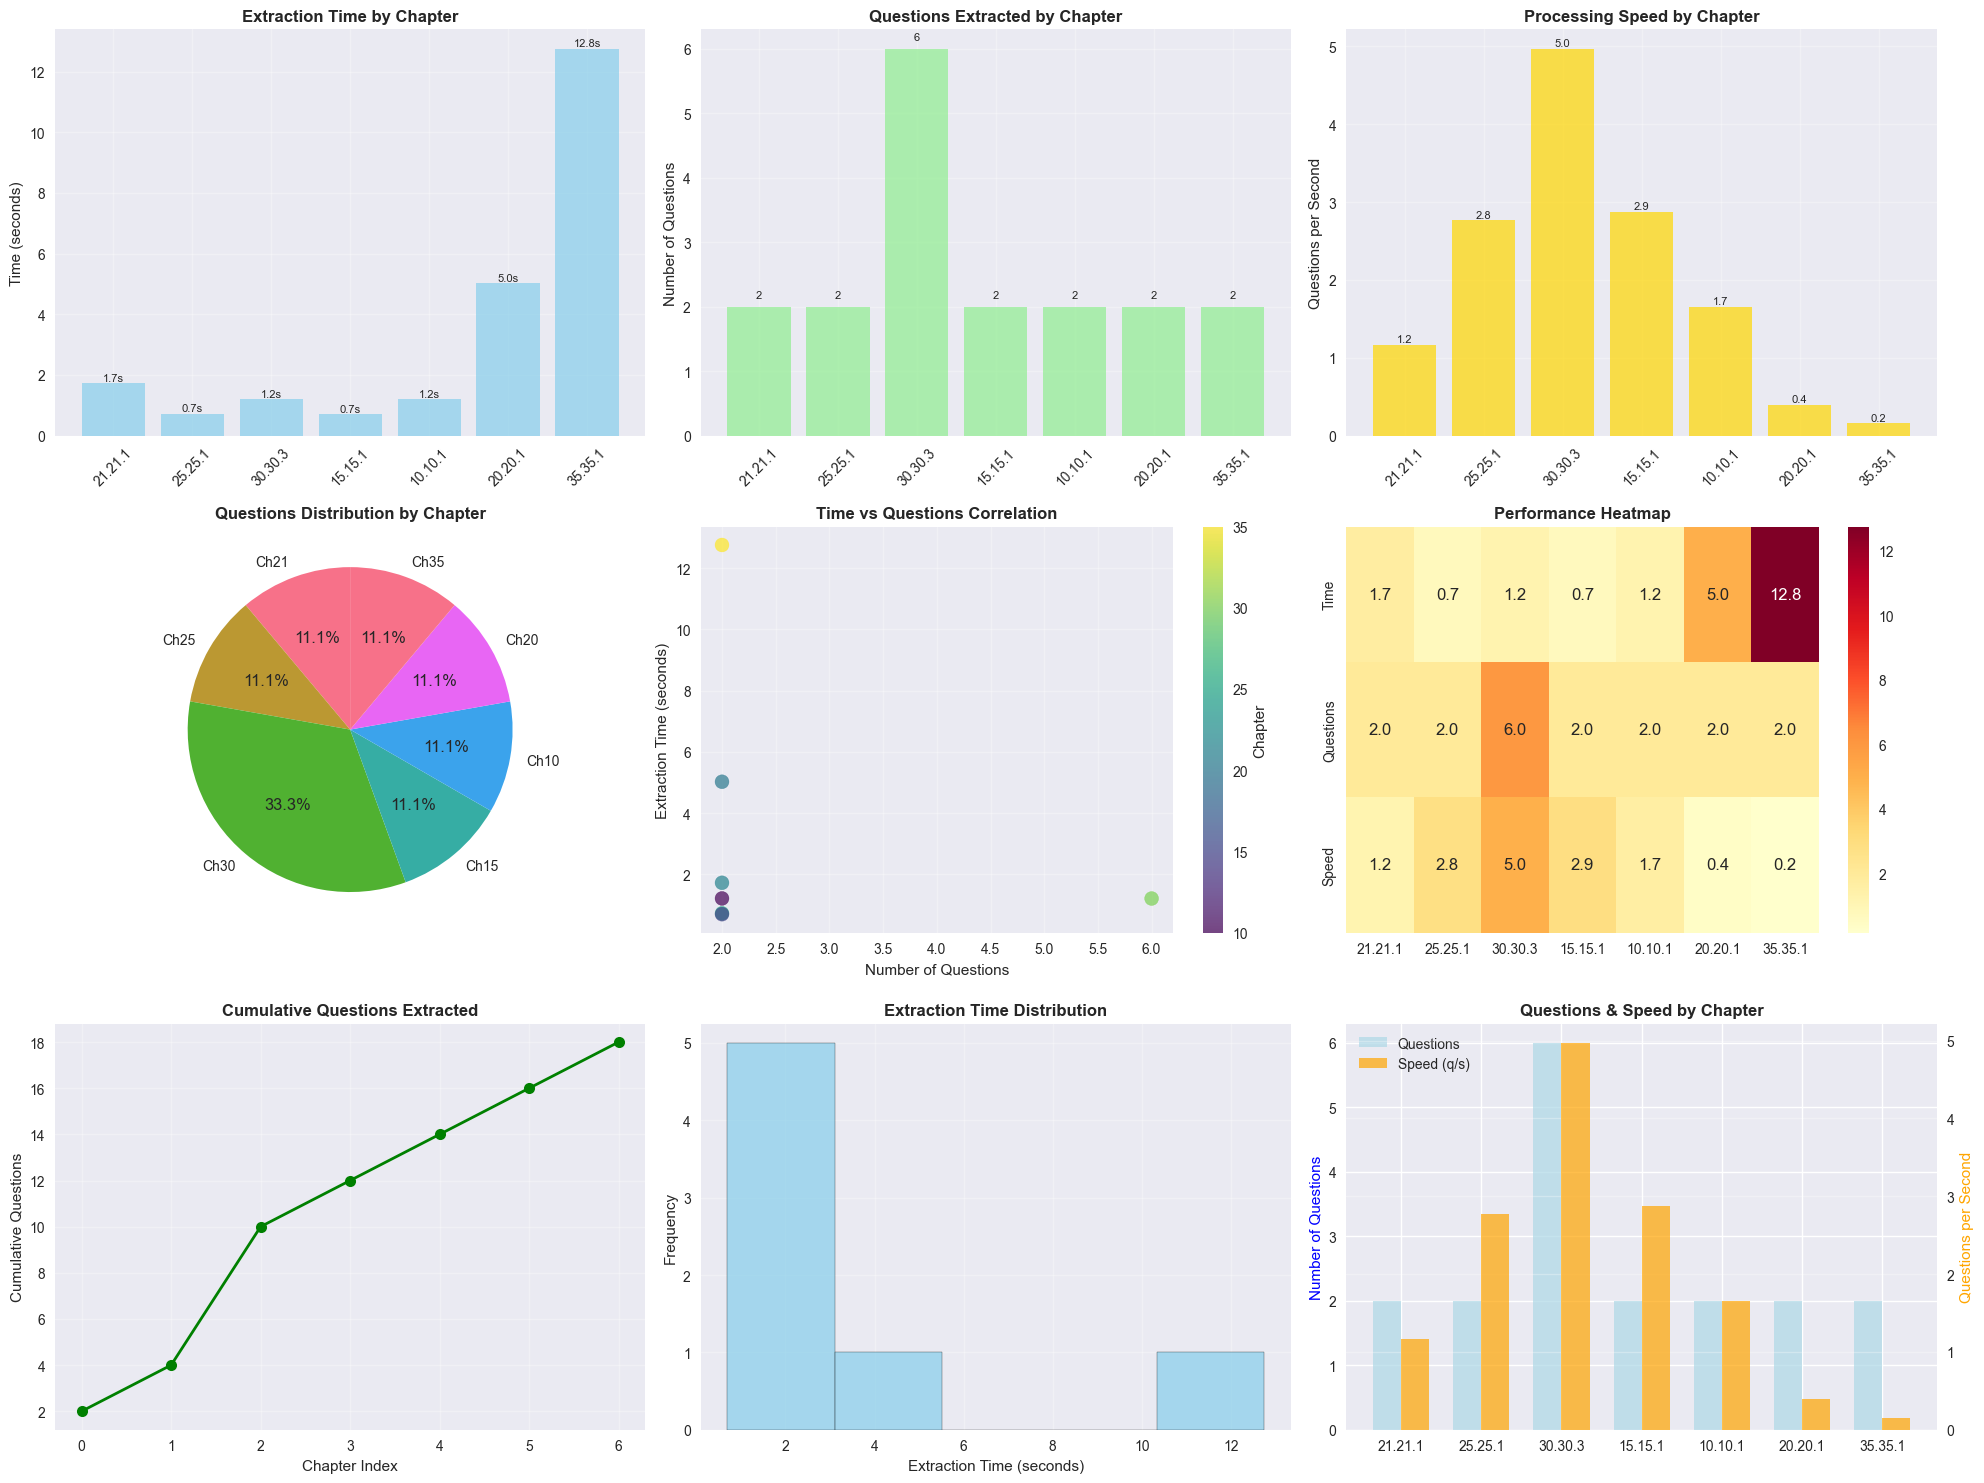

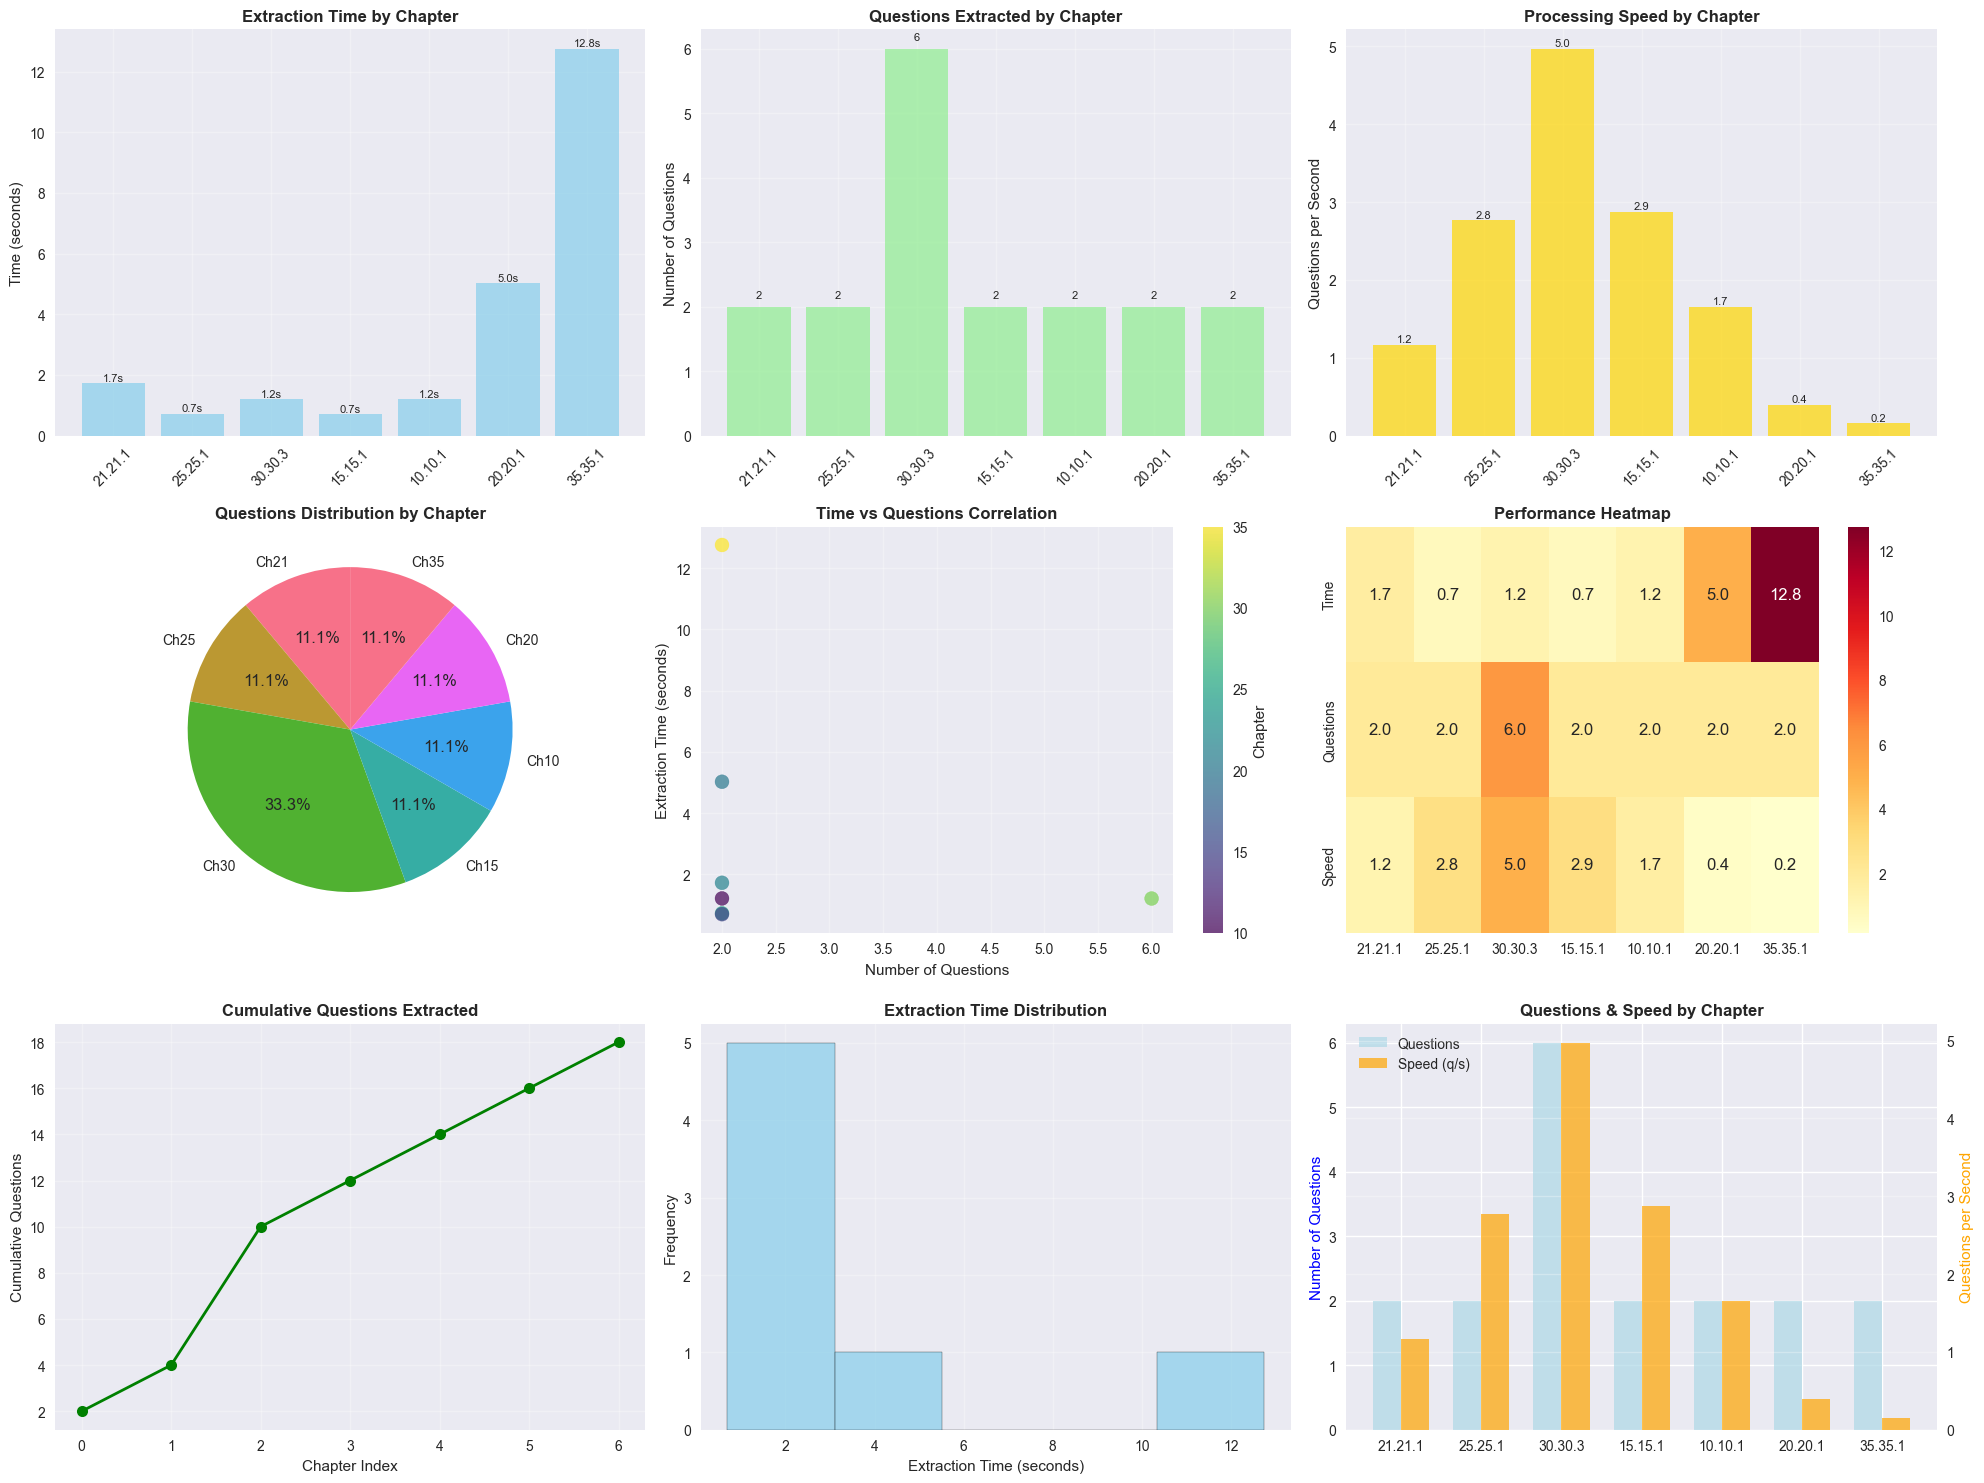

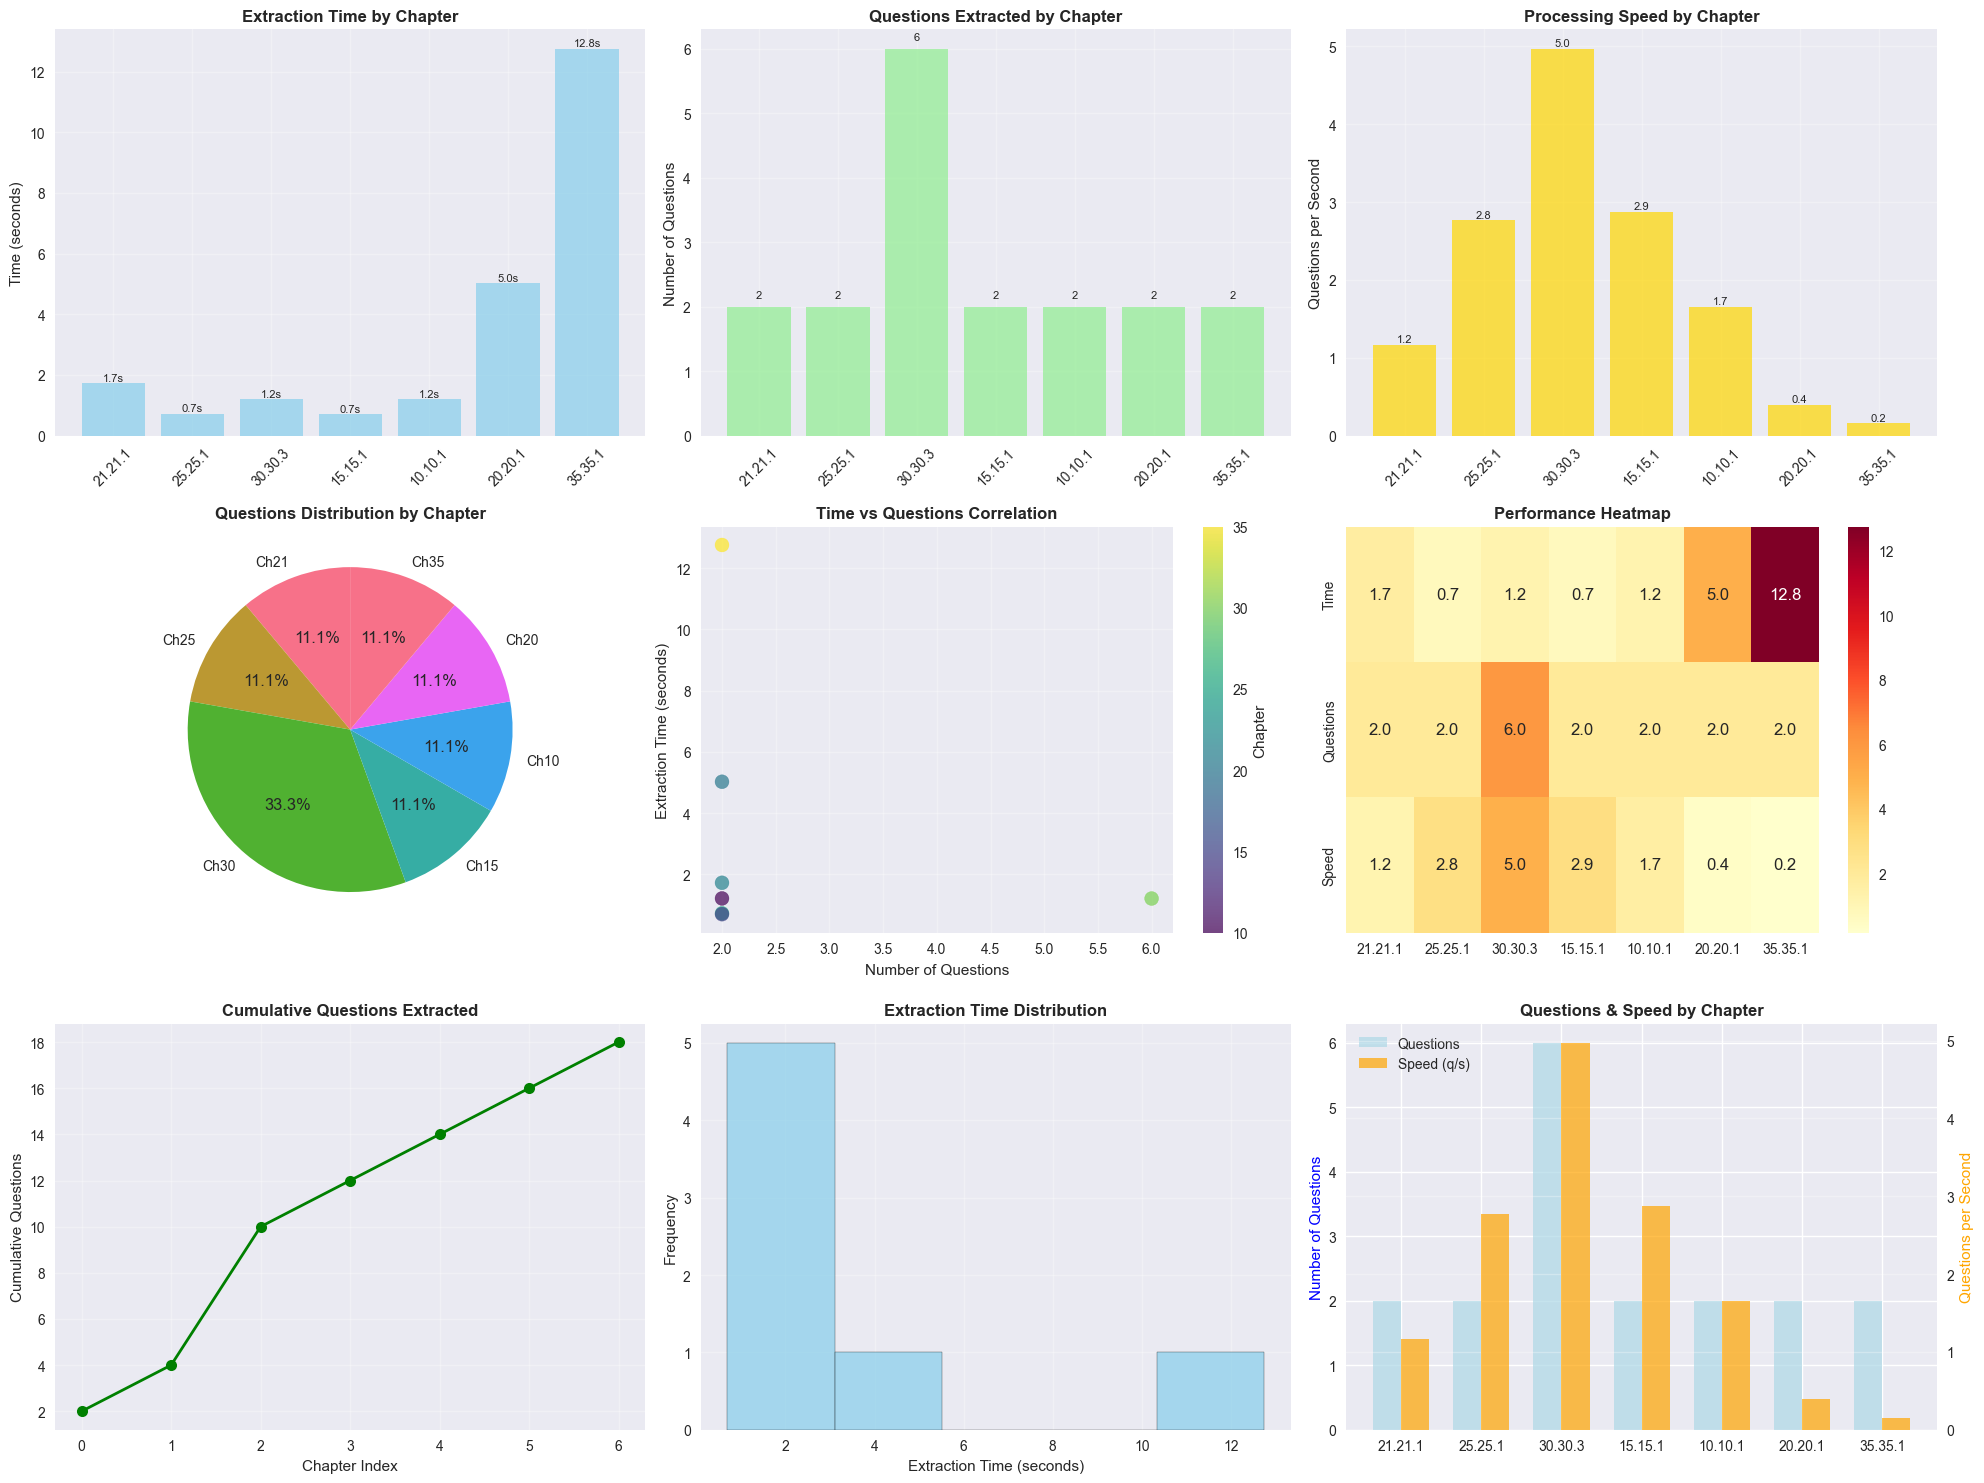


📊 Performance Summary:
Total chapters analyzed: 7
Total questions extracted: 18
Average extraction time: 3.33 seconds
Average questions per chapter: 2.6
Average processing speed: 2.00 questions/second
Note: Illustration/Exercise breakdown not available in current data
Available columns: ['chapter', 'topic', 'extraction_time', 'question_count', 'valid_questions', 'quality_score', 'latex_errors', 'questions_per_second']


In [20]:
# Performance visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# interactive backend 
try:
    matplotlib.use('inline')  
except:
    try:
        matplotlib.use('Qt5Agg')  # Alternative backend
    except:
        matplotlib.use('TkAgg')  # Fallback backend

# Disable LaTeX rendering to avoid tex errors
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'

# Enable inline plotting 
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

if not df.empty:
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Extraction Time by Chapter
    plt.subplot(3, 3, 1)
    bars = plt.bar(range(len(df)), df['extraction_time'], color='skyblue', alpha=0.7)
    plt.title('Extraction Time by Chapter', fontsize=12, fontweight='bold')
    plt.ylabel('Time (seconds)')
    plt.xticks(range(len(df)), [f"{row['chapter']}.{row['topic']}" for _, row in df.iterrows()], rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, time_val in zip(bars, df['extraction_time']):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                 f'{time_val:.1f}s', ha='center', va='bottom', fontsize=8)
    
    # 2. Questions Extracted
    plt.subplot(3, 3, 2)
    bars = plt.bar(range(len(df)), df['question_count'], color='lightgreen', alpha=0.7)
    plt.title('Questions Extracted by Chapter', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Questions')
    plt.xticks(range(len(df)), [f"{row['chapter']}.{row['topic']}" for _, row in df.iterrows()], rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, df['question_count']):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                 f'{count}', ha='center', va='bottom', fontsize=8)
    
    # 3. Processing Speed
    plt.subplot(3, 3, 3)
    bars = plt.bar(range(len(df)), df['questions_per_second'], color='gold', alpha=0.7)
    plt.title('Processing Speed by Chapter', fontsize=12, fontweight='bold')
    plt.ylabel('Questions per Second')
    plt.xticks(range(len(df)), [f"{row['chapter']}.{row['topic']}" for _, row in df.iterrows()], rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, speed in zip(bars, df['questions_per_second']):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                 f'{speed:.1f}', ha='center', va='bottom', fontsize=8)
    
    # 4. Question Type Distribution (Modified to handle missing columns)
    plt.subplot(3, 3, 4)
    
    # Check if illustration/exercise columns exist, if not create dummy data or skip
    if 'illustrations' in df.columns and 'exercises' in df.columns:
        total_illustrations = df['illustrations'].sum()
        total_exercises = df['exercises'].sum()
        
        plt.pie([total_illustrations, total_exercises], 
                labels=['Illustrations', 'Exercises'], 
                autopct='%1.1f%%', 
                colors=['lightblue', 'lightcoral'], 
                startangle=90)
        plt.title('Question Type Distribution', fontsize=12, fontweight='bold')
    else:
        # Alternative: Show total questions per chapter as pie chart
        plt.pie(df['question_count'], 
                labels=[f"Ch{row['chapter']}" for _, row in df.iterrows()], 
                autopct='%1.1f%%', 
                startangle=90)
        plt.title('Questions Distribution by Chapter', fontsize=12, fontweight='bold')
    
    # 5. Time vs Questions Scatter
    plt.subplot(3, 3, 5)
    scatter = plt.scatter(df['question_count'], df['extraction_time'], 
                         alpha=0.7, s=100, c=df['chapter'], cmap='viridis')
    plt.xlabel('Number of Questions')
    plt.ylabel('Extraction Time (seconds)')
    plt.title('Time vs Questions Correlation', fontsize=12, fontweight='bold')
    plt.colorbar(scatter, label='Chapter')
    plt.grid(True, alpha=0.3)
    
    # 6. Chapter Performance Heatmap
    plt.subplot(3, 3, 6)
    heatmap_data = df[['extraction_time', 'question_count', 'questions_per_second']].values
    sns.heatmap(heatmap_data.T, 
                xticklabels=[f"{row['chapter']}.{row['topic']}" for _, row in df.iterrows()],
                yticklabels=['Time', 'Questions', 'Speed'],
                annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Performance Heatmap', fontsize=12, fontweight='bold')
    
    # 7. Cumulative Performance
    plt.subplot(3, 3, 7)
    cumulative_questions = df['question_count'].cumsum()
    cumulative_time = df['extraction_time'].cumsum()
    
    plt.plot(range(len(df)), cumulative_questions, 'o-', color='green', linewidth=2, markersize=8)
    plt.xlabel('Chapter Index')
    plt.ylabel('Cumulative Questions')
    plt.title('Cumulative Questions Extracted', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 8. Performance Distribution
    plt.subplot(3, 3, 8)
    plt.hist(df['extraction_time'], bins=min(5, len(df)), alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Extraction Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('Extraction Time Distribution', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 9. Modified Question Type by Chapter (handles missing columns)
    plt.subplot(3, 3, 9)
    x = range(len(df))
    width = 0.35
    
    if 'illustrations' in df.columns and 'exercises' in df.columns:
        plt.bar([i - width/2 for i in x], df['illustrations'], width, label='Illustrations', alpha=0.7)
        plt.bar([i + width/2 for i in x], df['exercises'], width, label='Exercises', alpha=0.7)
        plt.title('Question Types by Chapter', fontsize=12, fontweight='bold')
    else:
        # Alternative: Show question count and processing speed
        ax9 = plt.gca()
        ax9_twin = ax9.twinx()
        
        bars1 = ax9.bar([i - width/2 for i in x], df['question_count'], width, 
                       label='Questions', alpha=0.7, color='lightblue')
        bars2 = ax9_twin.bar([i + width/2 for i in x], df['questions_per_second'], width,
                            label='Speed (q/s)', alpha=0.7, color='orange')
        
        ax9.set_ylabel('Number of Questions', color='blue')
        ax9_twin.set_ylabel('Questions per Second', color='orange')
        plt.title('Questions & Speed by Chapter', fontsize=12, fontweight='bold')
        
        # Create combined legend
        lines1, labels1 = ax9.get_legend_handles_labels()
        lines2, labels2 = ax9_twin.get_legend_handles_labels()
        ax9.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.xlabel('Chapter')
    plt.xticks(x, [f"{row['chapter']}.{row['topic']}" for _, row in df.iterrows()], rotation=45)
    if 'illustrations' in df.columns and 'exercises' in df.columns:
        plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # For Jupyter notebooks - use display instead of show
    try:
        plt.show()
    except:
        # Alternative: save and display
        plt.savefig('temp_plot.png', dpi=150, bbox_inches='tight')
        from IPython.display import Image, display
        display(Image('temp_plot.png'))
        import os
        os.remove('temp_plot.png')  # Clean up temp file
    
    # Performance summary
    print("\n📊 Performance Summary:")
    print("=" * 50)
    print(f"Total chapters analyzed: {len(df)}")
    print(f"Total questions extracted: {df['question_count'].sum()}")
    print(f"Average extraction time: {df['extraction_time'].mean():.2f} seconds")
    print(f"Average questions per chapter: {df['question_count'].mean():.1f}")
    print(f"Average processing speed: {df['questions_per_second'].mean():.2f} questions/second")
    
    # Only show illustration/exercise stats if columns exist
    if 'illustrations' in df.columns and 'exercises' in df.columns:
        print(f"Total illustrations: {df['illustrations'].sum()}")
        print(f"Total exercises: {df['exercises'].sum()}")
    else:
        print("Note: Illustration/Exercise breakdown not available in current data")
        print("Available columns:", list(df.columns))

else:
    print("DataFrame is empty - no data to visualize")

## 📐 LaTeX Quality Analysis

03:33:06 - src.main - INFO - Starting extraction for Chapter 30, Topic 30.3


Output()

03:33:08 - src.llm_interface.groq_client - INFO - Successfully extracted 6 questions


03:33:08 - src.main - INFO - Extraction completed: 6 questions extracted in 1.86s


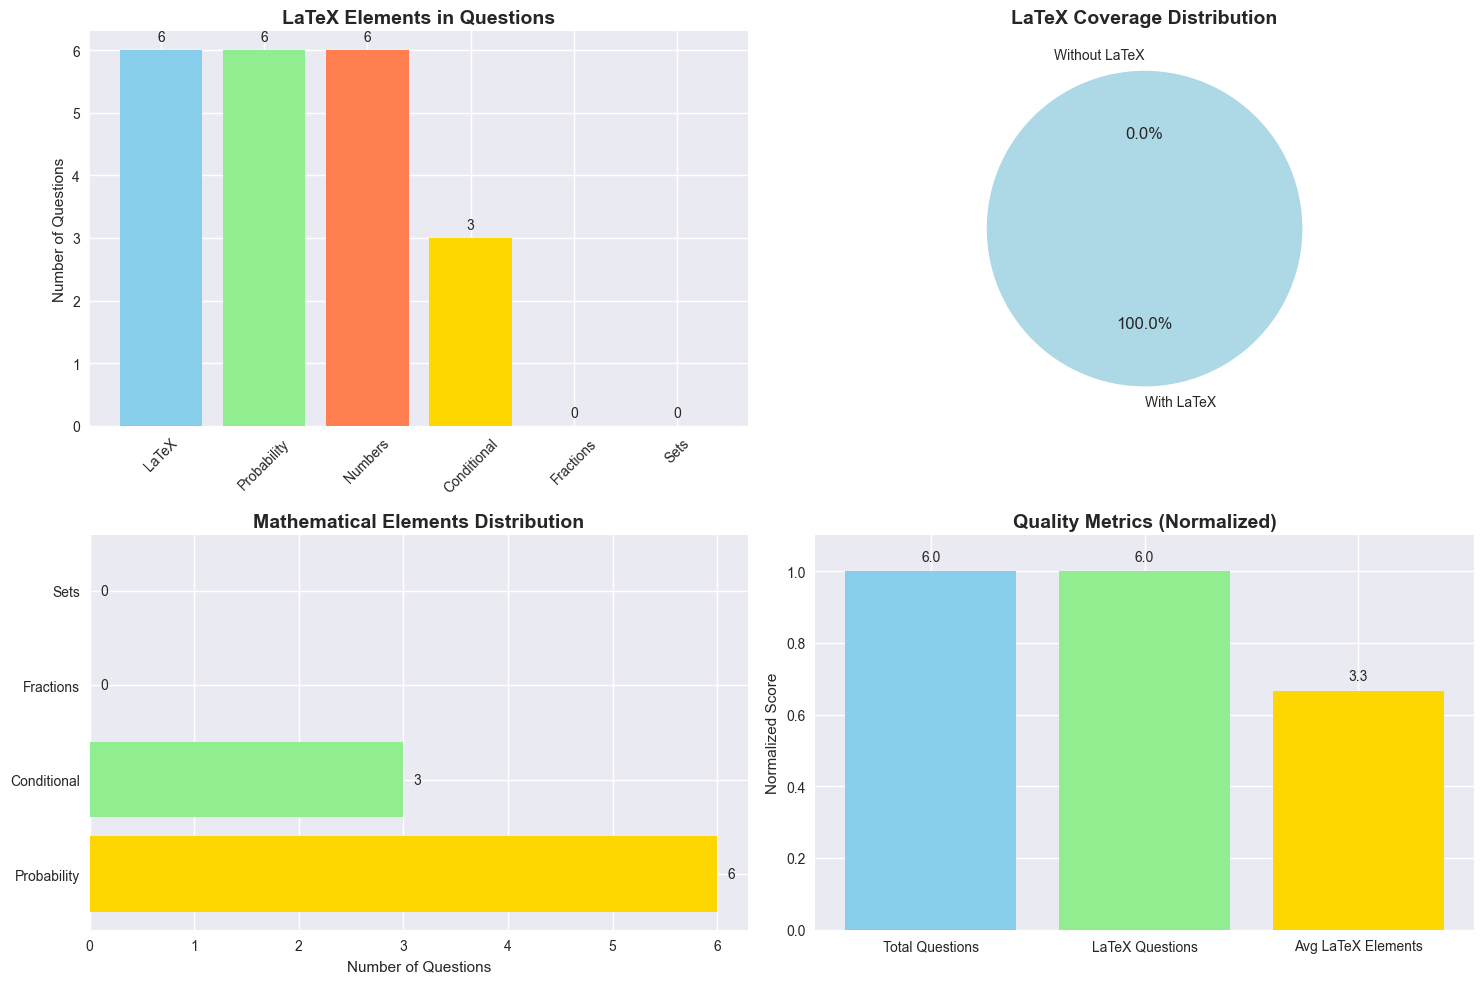


🔍 LaTeX Quality Analysis Results:
📊 Total questions analyzed: 6
📝 Questions with LaTeX: 6 (100.0%)
🎲 Questions with probability notation: 6
🔢 Questions with numbers: 6
📐 Questions with conditional probability: 3
➗ Questions with fractions: 0
🔗 Questions with set operations: 0
📈 Average LaTeX elements per question: 3.33

🏆 LaTeX Quality Rating: Excellent ⭐⭐⭐⭐⭐
💡 Recommendation: Great job! Mathematical formatting is excellent.


In [23]:
# Analyze LaTeX quality
def analyze_latex_quality():
    """Analyze LaTeX formatting quality across extracted questions."""
    # Get sample questions for analysis
    sample_questions = extractor.extract_questions(30, "30.3", "json")
    
    if not sample_questions:
        print("❌ No questions available for LaTeX analysis")
        return None
    
    latex_analysis = {
        'total_questions': len(sample_questions),
        'questions_with_latex': 0,
        'questions_with_probability': 0,
        'questions_with_numbers': 0,
        'questions_with_conditional': 0,
        'questions_with_fractions': 0,
        'questions_with_sets': 0,
        'average_latex_elements': 0
    }
    
    total_latex_elements = 0
    
    for question in sample_questions:
        text = question.get('question_text', '')
        latex_count = 0
        
        # Check for various LaTeX elements
        if '$' in text:
            latex_analysis['questions_with_latex'] += 1
            latex_count += text.count('$') // 2  # Count math mode pairs
        
        if 'P(' in text:
            latex_analysis['questions_with_probability'] += 1
        
        if any(char.isdigit() for char in text):
            latex_analysis['questions_with_numbers'] += 1
        
        if '|' in text:
            latex_analysis['questions_with_conditional'] += 1
        
        if '\\frac{' in text:
            latex_analysis['questions_with_fractions'] += 1
        
        if '\\cap' in text or '\\cup' in text:
            latex_analysis['questions_with_sets'] += 1
        
        total_latex_elements += latex_count
    
    latex_analysis['average_latex_elements'] = total_latex_elements / len(sample_questions) if len(sample_questions) > 0 else 0
    
    return latex_analysis

# Run LaTeX analysis
latex_analysis = analyze_latex_quality()

if latex_analysis:
    # Create LaTeX quality visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. LaTeX Elements Distribution
    categories = ['LaTeX', 'Probability', 'Numbers', 'Conditional', 'Fractions', 'Sets']
    counts = [
        latex_analysis['questions_with_latex'],
        latex_analysis['questions_with_probability'],
        latex_analysis['questions_with_numbers'],
        latex_analysis['questions_with_conditional'],
        latex_analysis['questions_with_fractions'],
        latex_analysis['questions_with_sets']
    ]
    
    bars = ax1.bar(categories, counts, color=['skyblue', 'lightgreen', 'coral', 'gold', 'plum', 'lightcyan'])
    ax1.set_title('LaTeX Elements in Questions', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Questions')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom', fontsize=10)
    
    # 2. LaTeX Coverage Pie Chart
    latex_questions = latex_analysis['questions_with_latex']
    non_latex_questions = latex_analysis['total_questions'] - latex_questions
    
    ax2.pie([latex_questions, non_latex_questions], 
            labels=['With LaTeX', 'Without LaTeX'],
            autopct='%1.1f%%',
            colors=['lightblue', 'lightcoral'],
            startangle=90)
    ax2.set_title('LaTeX Coverage Distribution', fontsize=14, fontweight='bold')
    
    # 3. Mathematical Elements Comparison
    math_elements = ['Probability', 'Conditional', 'Fractions', 'Sets']
    math_counts = [
        latex_analysis['questions_with_probability'],
        latex_analysis['questions_with_conditional'],
        latex_analysis['questions_with_fractions'],
        latex_analysis['questions_with_sets']
    ]
    
    bars = ax3.barh(math_elements, math_counts, color=['gold', 'lightgreen', 'coral', 'plum'])
    ax3.set_title('Mathematical Elements Distribution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Number of Questions')
    
    # Add value labels
    for bar, count in zip(bars, math_counts):
        ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2.,
                f'{count}', ha='left', va='center', fontsize=10)
    
    # 4. Quality Metrics Summary
    metrics = ['Total Questions', 'LaTeX Questions', 'Avg LaTeX Elements']
    values = [
        latex_analysis['total_questions'],
        latex_analysis['questions_with_latex'],
        latex_analysis['average_latex_elements']
    ]
    
    # Normalize for visualization (different scales)
    normalized_values = [
        values[0] / max(values[0], 1),  # Total questions (normalized to 1)
        values[1] / max(values[0], 1),  # LaTeX questions (as fraction of total)
        min(values[2] / 5, 1)           # Avg elements (capped at 1 for 5+ elements)
    ]
    
    bars = ax4.bar(metrics, normalized_values, color=['skyblue', 'lightgreen', 'gold'])
    ax4.set_title('Quality Metrics (Normalized)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Normalized Score')
    ax4.set_ylim(0, 1.1)
    
    # Add actual value labels
    for bar, actual_val, norm_val in zip(bars, values, normalized_values):
        ax4.text(bar.get_x() + bar.get_width()/2., norm_val + 0.02,
                f'{actual_val:.1f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n🔍 LaTeX Quality Analysis Results:")
    print("=" * 50)
    print(f"📊 Total questions analyzed: {latex_analysis['total_questions']}")
    print(f"📝 Questions with LaTeX: {latex_analysis['questions_with_latex']} ({latex_analysis['questions_with_latex']/latex_analysis['total_questions']*100:.1f}%)")
    print(f"🎲 Questions with probability notation: {latex_analysis['questions_with_probability']}")
    print(f"🔢 Questions with numbers: {latex_analysis['questions_with_numbers']}")
    print(f"📐 Questions with conditional probability: {latex_analysis['questions_with_conditional']}")
    print(f"➗ Questions with fractions: {latex_analysis['questions_with_fractions']}")
    print(f"🔗 Questions with set operations: {latex_analysis['questions_with_sets']}")
    print(f"📈 Average LaTeX elements per question: {latex_analysis['average_latex_elements']:.2f}")
    
    # Quality assessment
    latex_coverage = latex_analysis['questions_with_latex'] / latex_analysis['total_questions']
    if latex_coverage > 0.8:
        quality_rating = "Excellent ⭐⭐⭐⭐⭐"
    elif latex_coverage > 0.6:
        quality_rating = "Good ⭐⭐⭐⭐"
    elif latex_coverage > 0.4:
        quality_rating = "Average ⭐⭐⭐"
    elif latex_coverage > 0.2:
        quality_rating = "Below Average ⭐⭐"
    else:
        quality_rating = "Poor ⭐"
    
    print(f"\n🏆 LaTeX Quality Rating: {quality_rating}")
    print(f"💡 Recommendation: {'Great job! Mathematical formatting is excellent.' if latex_coverage > 0.6 else 'Consider improving LaTeX formatting for better mathematical representation.'}")

else:
    print("❌ LaTeX analysis could not be completed - no data available")